# Exploração e Análise dos Resultados

Essa análise exploratória dos resultados obtidos no experimento faz parte do projeto final da disciplina de visualização de dados oferecida no primeiro semestre de 2017 pela Faculdade de Engenhearia Elétrica da Unicamp. Os desenvolvedores do projeto são: 
- Filipe Antonio de Barros Reis - RA 091202
- Guilherme Augusto Câmara - RA 106694
- Gabriel Lisbôa Guimarães Divino - RA 116932

In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import operator
import re
import csv
from __future__ import division
%matplotlib notebook

## Abrindo o Arquivo

In [2]:
fh = open('results.csv','r+').read()
_fh = open('edited_results.csv','w+')

for line in fh.split('\n'):
    newline = line.replace('size','_size').replace('-1','0')
    _fh.write('{}\n'.format(newline))

_fh.close()

Definição dos parâmetros variados e conjuntos de dados considerados

In [3]:
MARKERS = ['o','v','^']
SIZES = [100,300,750]
CMAPS = ['Greys','GnBu','YlOrRd']
TYPES=['linearDecrease','linearIncrease','constant']


A pontuação é definida como o número de vezes em que o gráfico foi escolhido sobre o número de vezes em que foi mostrado. Tal pontuação foi utilizada para evitar penalizações das visualizações não escolhidas, visto que a preferência de uma opção frente a outra não indica que a não escolhida é de fato ruim. 

In [4]:
def _score(values):
    return sum(values)/len(values)

In [5]:
df = pd.read_csv('edited_results.csv',sep=',')
fea_dict={}
for index,row in df.iterrows():
    fea_name = '{}_{}_{}_{}'.format(row.graph_type,row.colormap,row.marker,row._size)
    if fea_name not in fea_dict:
        fea_dict[fea_name] = [row.score,1]
    else:
        sc = fea_dict[fea_name]
        fea_dict[fea_name] = [sc[0]+row.score,sc[1]+1]

allTypes=dict()
for k,v in fea_dict.iteritems():
    allTypes[k] = float(v[0]/float(v[1]))
    
#print fea_dict
df_allTypes = pd.DataFrame.from_dict(allTypes,orient='index')
df_allTypes.head()


,0
linearDecrease_GnBu_o_100,0.714286
constant_Greys_o_750,0.375000
constant_YlOrRd_v_100,0.666667
linearDecrease_YlOrRd_o_100,0.333333
constant_YlOrRd_^_300,0.619048


In [6]:
df_ld = df[df.graph_type == 'linearDecrease']
df_li = df[df.graph_type == 'linearIncrease']
df_ct = df[df.graph_type == 'constant']

### Processamento do caso linear decrescente

In [7]:
fea_dict={}
for index,row in df_ld.iterrows():
    fea_name = '{}_{}_{}_{}'.format(row.graph_type,row.colormap,row.marker,row._size)
    if fea_name not in fea_dict:
        fea_dict[fea_name] = [row.score,1]
    else:
        sc = fea_dict[fea_name]
        fea_dict[fea_name] = [sc[0]+row.score,sc[1]+1]

ldecrease=dict()
for k,v in fea_dict.iteritems():
    ldecrease[k.strip('linearDecrease_')] = float(v[0]/float(v[1]))
    
df_lDecrease = pd.DataFrame.from_dict(ldecrease,orient='index')
df_lDecrease.columns = ['linearDecrease']
df_lDecrease.head()

,linearDecrease
Greys_v_100,0.312500
GnBu_o_100,0.714286
YlOrRd_^_100,0.571429
YlOrRd_o_300,0.533333
GnBu_o_750,0.578947


### Processamento do caso linear crescente

In [8]:
fea_dict={}
for index,row in df_li.iterrows():
    fea_name = '{}_{}_{}_{}'.format(row.graph_type,row.colormap,row.marker,row._size)
    if fea_name not in fea_dict:
        fea_dict[fea_name] = [row.score,1]
    else:
        sc = fea_dict[fea_name]
        fea_dict[fea_name] = [sc[0]+row.score,sc[1]+1]
        
lincrease=dict()
for k,v in fea_dict.iteritems():
    lincrease[k.strip('linearIncrease_')] = float(v[0]/float(v[1]))
    
df_lIncrease = pd.DataFrame.from_dict(lincrease,orient='index')
df_lIncrease.columns = ['linearIncrease']
df_lIncrease.head()

,linearIncrease
Greys_v_100,0.285714
GnBu_o_100,0.833333
YlOrRd_^_100,0.437500
YlOrRd_o_300,0.736842
GnBu_o_750,0.421053


### Processamento do caso constante

In [9]:
fea_dict={}
for index,row in df_ct.iterrows():
    fea_name = '{}_{}_{}_{}'.format(row.graph_type,row.colormap,row.marker,row._size)
    if fea_name not in fea_dict:
        fea_dict[fea_name] = [row.score,1]
    else:
        sc = fea_dict[fea_name]
        fea_dict[fea_name] = [sc[0]+row.score,sc[1]+1]
        
ct=dict()
for k,v in fea_dict.iteritems():
    ct[k.strip('constant_')] = float(v[0]/float(v[1]))
    
df_constant = pd.DataFrame.from_dict(ct,orient='index')
df_constant.columns = ['constant']
df_constant.head()

,constant
Greys_v_100,0.500000
GnBu_o_100,0.692308
YlOrRd_^_100,0.666667
YlOrRd_o_300,0.357143
GnBu_o_750,0.705882


### Visualização dos Resultados

<IPython.core.display.Javascript object>


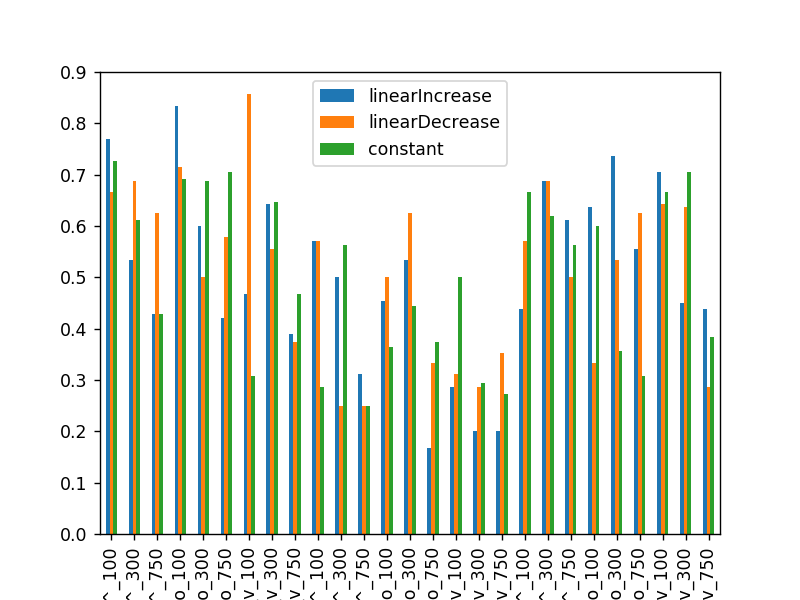

In [10]:
df_allTypes = pd.concat([df_lIncrease,df_lDecrease,df_constant],axis=1)
df_allTypes.plot.bar()
plt.show()

## Pesquisa 1: 

Variando o tipo do marcador

Tipo do Marcador:^; Tipo do dado:linearDecrease; Número de amostras: 45
Tipo do Marcador:^; Tipo do dado:constant; Número de amostras: 47
Tipo do Marcador:^; Tipo do dado:linearIncrease; Número de amostras: 47
Tipo do Marcador:o; Tipo do dado:linearDecrease; Número de amostras: 57
Tipo do Marcador:o; Tipo do dado:constant; Número de amostras: 44
Tipo do Marcador:o; Tipo do dado:linearIncrease; Número de amostras: 49
Tipo do Marcador:v; Tipo do dado:linearDecrease; Número de amostras: 44
Tipo do Marcador:v; Tipo do dado:constant; Número de amostras: 43
Tipo do Marcador:v; Tipo do dado:linearIncrease; Número de amostras: 48


<IPython.core.display.Javascript object>


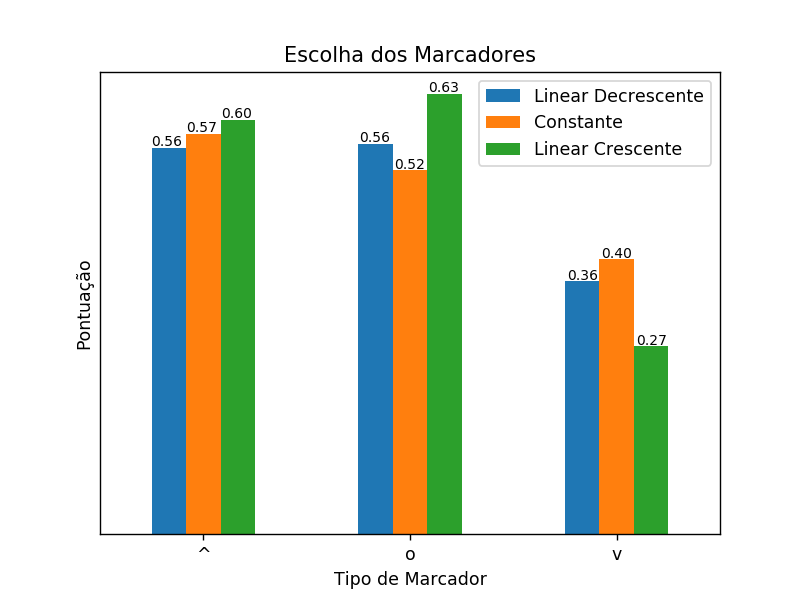

In [11]:
peq1 = {'o' : {'linearIncrease' : [], 'linearDecrease' : [], 'constant': []},
        'v' : {'linearIncrease' : [], 'linearDecrease' : [], 'constant': []},
        '^' : {'linearIncrease' : [], 'linearDecrease' : [], 'constant': []}}
with open('edited_results.csv') as fh:
    reader = csv.reader(fh)
    next(reader) #Ignora a primera linha (header)
    i=0
    for row in reader:
        if i==0:
            l1 = row
            i+=1
            continue
        else:
            l2 = row
            i=0

        if l1[5] != l2[5]:
            peq1[l1[5]][l1[3]].append(int(l1[-1]))
            peq1[l2[5]][l2[3]].append(int(l2[-1]))
    
# Calculando score
score = peq1
for marker in peq1:
    for typ in peq1[marker]:
        print 'Tipo do Marcador:{0}; Tipo do dado:{1}; Número de amostras: {2}'.format(marker, typ, len(peq1[marker][typ]))
        score[marker][typ] = _score(peq1[marker][typ])
df_peq1 = pd.DataFrame.from_dict(score,orient='index')
df_peq1.columns = ['Linear Decrescente','Constante','Linear Crescente']
ax1 = df_peq1.plot.bar(rot=0, title = 'Escolha dos Marcadores')
ax1.set_xlabel("Tipo de Marcador") 
ax1.set_ylabel(u"Pontuação") 
ax1.set_yticks([])
for p in ax1.patches:
    ax1.annotate('{:.2f}'.format(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=8)

## Pesquisa 2: 

Variando o tamanho.

Tamanho do Marcador:300; Tipo do dado:linearDecrease; Número de amostras: 31
Tamanho do Marcador:300; Tipo do dado:constant; Número de amostras: 37
Tamanho do Marcador:300; Tipo do dado:linearIncrease; Número de amostras: 43
Tamanho do Marcador:100; Tipo do dado:linearDecrease; Número de amostras: 44
Tamanho do Marcador:100; Tipo do dado:constant; Número de amostras: 45
Tamanho do Marcador:100; Tipo do dado:linearIncrease; Número de amostras: 32
Tamanho do Marcador:750; Tipo do dado:linearDecrease; Número de amostras: 41
Tamanho do Marcador:750; Tipo do dado:constant; Número de amostras: 48
Tamanho do Marcador:750; Tipo do dado:linearIncrease; Número de amostras: 45


<IPython.core.display.Javascript object>


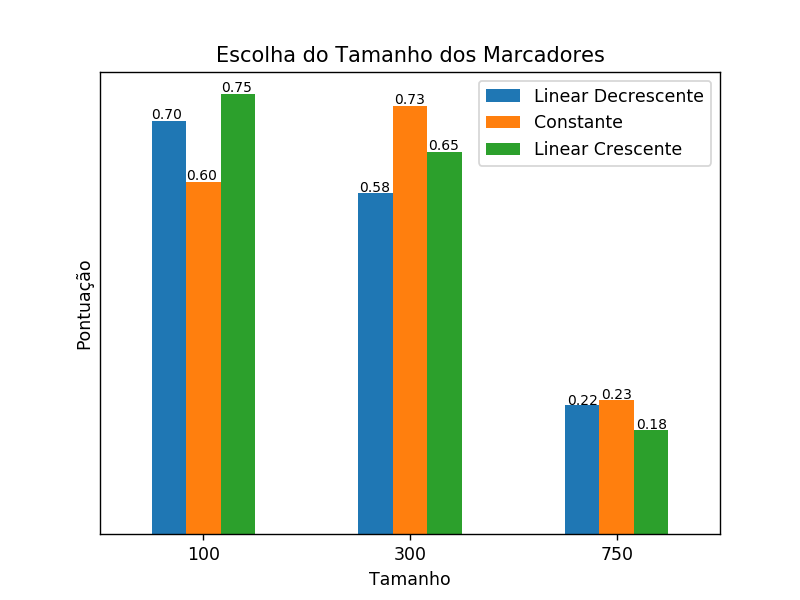

[]

In [12]:
peq2 = {'100' : {'linearIncrease' : [], 'linearDecrease' : [], 'constant': []},
        '300' : {'linearIncrease' : [], 'linearDecrease' : [], 'constant': []},
        '750' : {'linearIncrease' : [], 'linearDecrease' : [], 'constant': []}}
with open('edited_results.csv') as fh:
    reader = csv.reader(fh)
    next(reader) #Ignora a primera linha (header)
    i=0
    for row in reader:
        if i==0:
            l1 = row
            i+=1
            continue
        else:
            l2 = row
            i=0

        if l1[6] != l2[6]:
            peq2[l1[6]][l1[3]].append(int(l1[-1]))
            peq2[l2[6]][l2[3]].append(int(l2[-1]))

# Calculando score

score2 = peq2
for _sizes in peq2:
    for typ in peq2[_sizes]:
        print 'Tamanho do Marcador:{0}; Tipo do dado:{1}; Número de amostras: {2}'.format(_sizes, typ, len(peq2[_sizes][typ]))
        score2[_sizes][typ]=_score(peq2[_sizes][typ])
df_peq2 = pd.DataFrame.from_dict(score2,orient='index')
df_peq2.columns = ['Linear Decrescente','Constante','Linear Crescente']
#df_peq2.plot.bar(rot=0, legend=True, title = 'Tamanho dos Marcadores')
ax2 = df_peq2.plot.bar(rot=0, legend=True, title = 'Escolha do Tamanho dos Marcadores')
ax2.set_xlabel("Tamanho") 
ax2.set_ylabel(u"Pontuação") 
ax2.set_yticks([])
for p in ax2.patches:
    ax2.annotate('{:.2f}'.format(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=8)
plt.plot()

## Pesquisa 3: 

Variando o colormap.

Mapa de Cores:YlOrRd; Tipo do dado:linearDecrease; Número de amostras: 46
Mapa de Cores:YlOrRd; Tipo do dado:constant; Número de amostras: 43
Mapa de Cores:YlOrRd; Tipo do dado:linearIncrease; Número de amostras: 48
Mapa de Cores:GnBu; Tipo do dado:linearDecrease; Número de amostras: 43
Mapa de Cores:GnBu; Tipo do dado:constant; Número de amostras: 54
Mapa de Cores:GnBu; Tipo do dado:linearIncrease; Número de amostras: 37
Mapa de Cores:Greys; Tipo do dado:linearDecrease; Número de amostras: 47
Mapa de Cores:Greys; Tipo do dado:constant; Número de amostras: 49
Mapa de Cores:Greys; Tipo do dado:linearIncrease; Número de amostras: 53


<IPython.core.display.Javascript object>


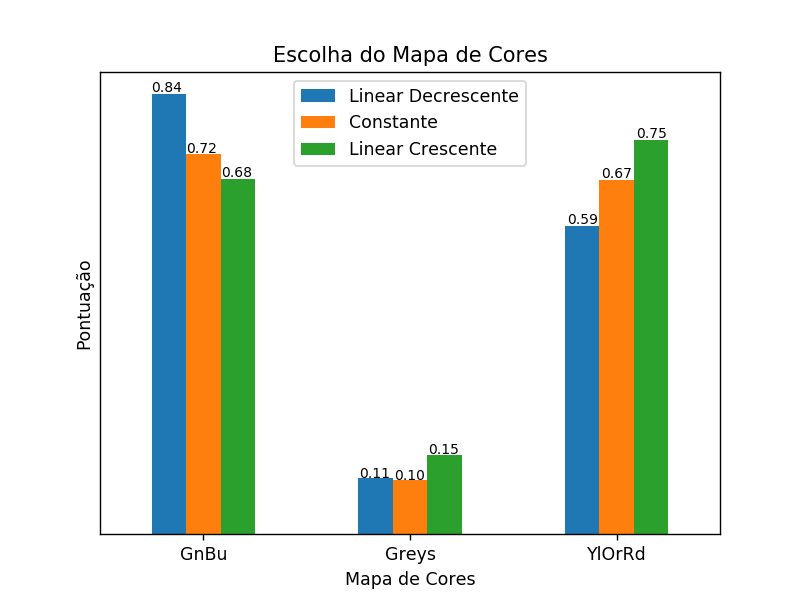

In [13]:
peq3 = {'YlOrRd' : {'linearIncrease' : [], 'linearDecrease' : [], 'constant': []},
        'GnBu' : {'linearIncrease' : [], 'linearDecrease' : [], 'constant': []},
        'Greys' : {'linearIncrease' : [], 'linearDecrease' : [], 'constant': []}}
with open('edited_results.csv') as fh:
    reader = csv.reader(fh)
    next(reader) #Ignora a primera linha (header)
    i=0
    for row in reader:
        if i==0:
            l1 = row
            i+=1
            continue
        else:
            l2 = row
            i=0

        if l1[4] != l2[4]:
            peq3[l1[4]][l1[3]].append(int(l1[-1]))
            peq3[l2[4]][l2[3]].append(int(l2[-1]))
# Calculando score
score3 = peq3
for _cm in peq3:
    for typ in peq3[_cm]:
        print 'Mapa de Cores:{0}; Tipo do dado:{1}; Número de amostras: {2}'.format(_cm, typ, len(peq3[_cm][typ]))
        score3[_cm][typ]=_score(peq3[_cm][typ])
df_peq3 = pd.DataFrame.from_dict(score3,orient='index')
df_peq3.columns = ['Linear Decrescente','Constante','Linear Crescente']
ax3 = df_peq3.plot.bar(rot=0, title='Escolha do Mapa de Cores')
ax3.set_xlabel("Mapa de Cores") 
ax3.set_ylabel(u"Pontuação") 
ax3.set_yticks([])
for p in ax3.patches:
    ax3.annotate('{:.2f}'.format(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=8)

## Alternativamente, podemos ver os resultados definidos por tipo de dados

<IPython.core.display.Javascript object>


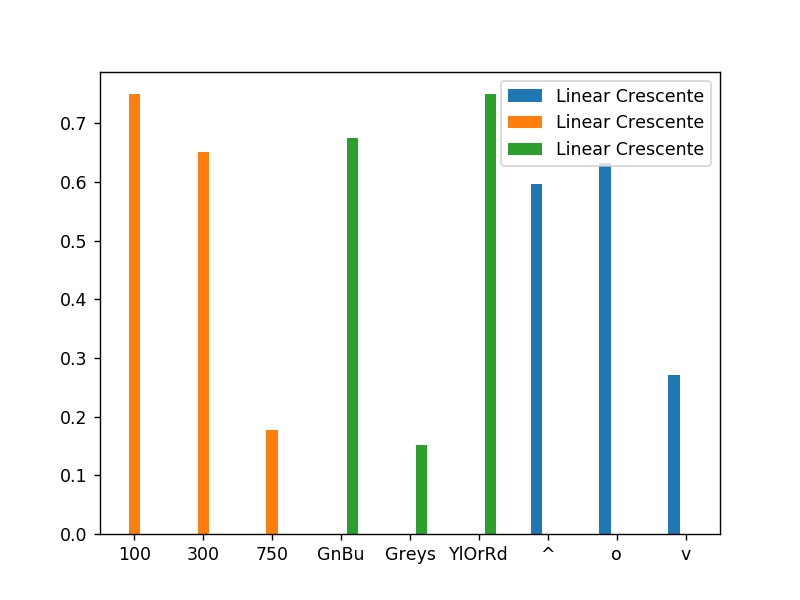

<IPython.core.display.Javascript object>


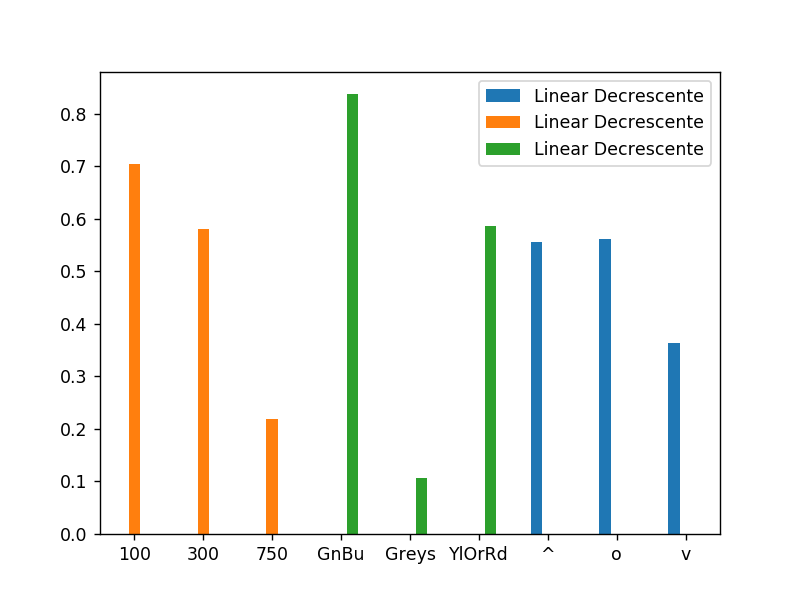

<IPython.core.display.Javascript object>


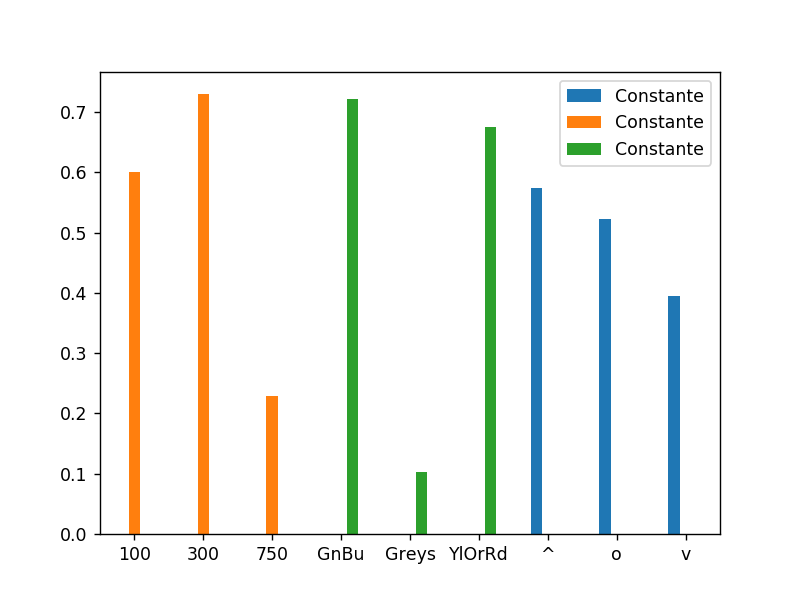

In [14]:
df_altlI = pd.concat([df_peq1[u'Linear Crescente'], df_peq2[u'Linear Crescente'],df_peq3[u'Linear Crescente']],axis=1)
df_altlI.plot.bar(rot=0)

df_altlD = pd.concat([df_peq1[u'Linear Decrescente'], df_peq2[u'Linear Decrescente'],df_peq3[u'Linear Decrescente']],axis=1)
df_altlD.plot.bar(rot=0)

df_altlC = pd.concat([df_peq1[u'Constante'], df_peq2[u'Constante'],df_peq3[u'Constante']],axis=1)
df_altlC.plot.bar(rot=0)

## Opções com Parâmetros Mais Votadas

<IPython.core.display.Javascript object>


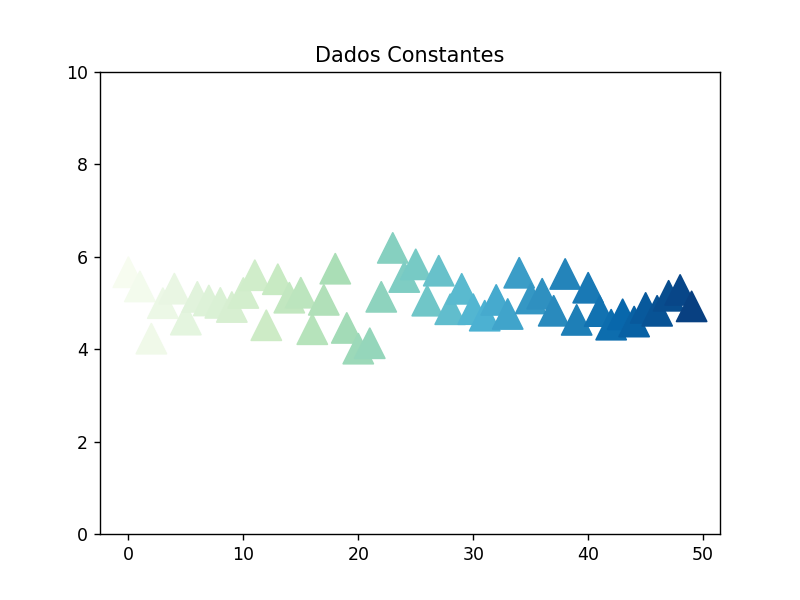

In [15]:
constant = numpy.load('constant.npy')
plt.figure()
plt.scatter(constant[0], constant[1], c=range(constant[1].size), cmap='GnBu', marker='^', s=300)
plt.title(u'Dados Constantes')
plt.ylim(0,10)
plt.show()

<IPython.core.display.Javascript object>


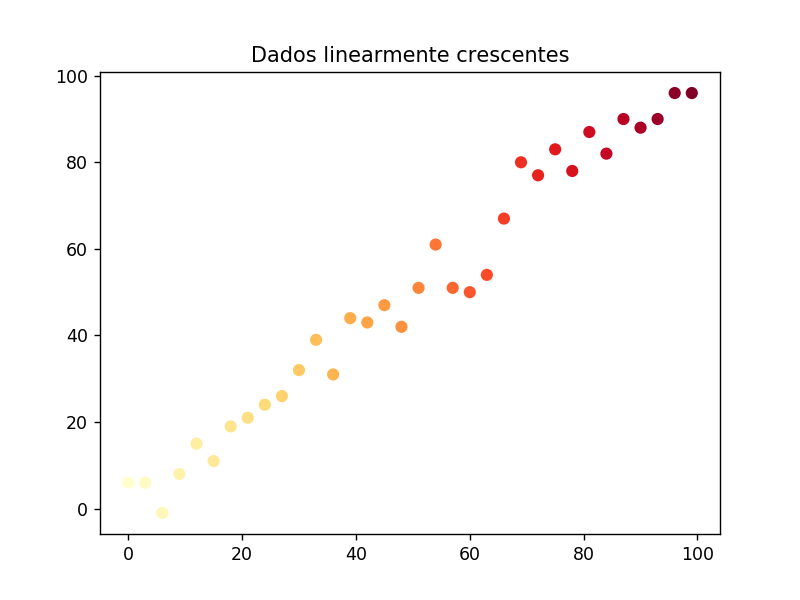

In [16]:
linearIncrease = numpy.load('linearIncrease.npy')
plt.figure()
plt.scatter(linearIncrease[0], linearIncrease[1], c=range(linearIncrease[1].size), cmap='YlOrRd', marker='o')
plt.title("Dados linearmente crescentes")
plt.show()

<IPython.core.display.Javascript object>


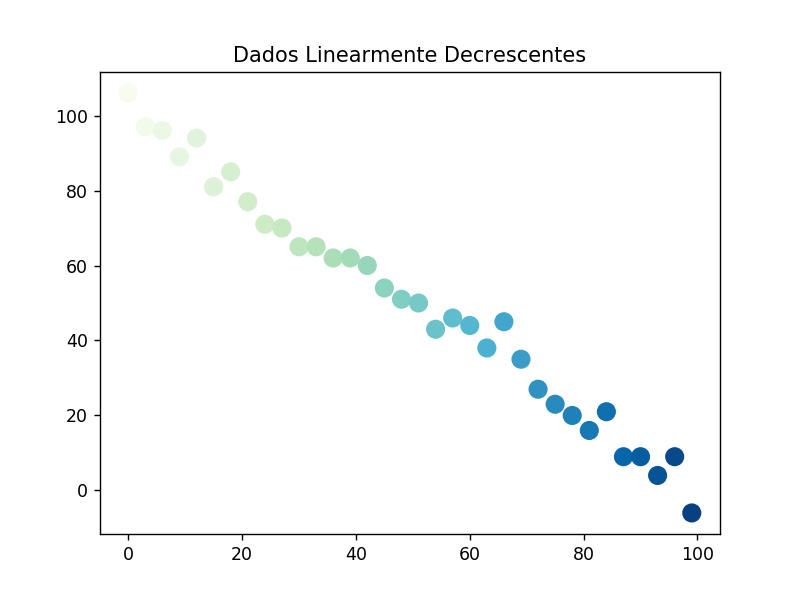

In [17]:
linearDecrease = numpy.load('linearDecrease.npy')
plt.figure()
plt.scatter(linearDecrease[0], linearDecrease[1], c=range(linearDecrease[1].size), cmap='GnBu', marker='o', s=100)
plt.title('Dados Linearmente Decrescentes')
plt.show()

## Opções Mais Votadas - Conjunto

A análise das opções mais votadas em conjunto se baseia em pontuações atribuídas á visualizações em conjunto 

In [18]:
print u'Visualização mais votada para dados linearmente crescentes (em conjunto): {0}'.format(df_allTypes.linearIncrease.idxmax())
#print df_allTypes.linearIncrease

Visualização mais votada para dados linearmente crescentes (em conjunto): GnBu_o_100


<IPython.core.display.Javascript object>


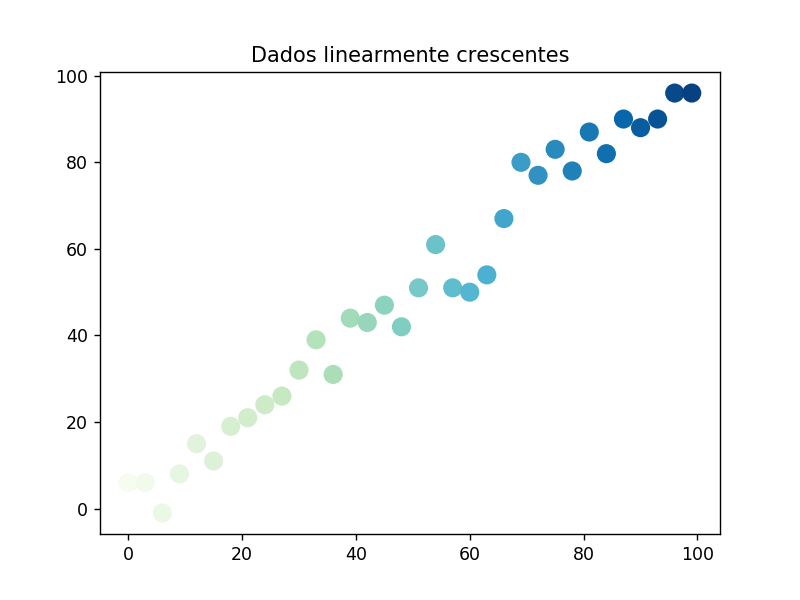

In [19]:
linearIncrease = numpy.load('linearIncrease.npy')
plt.figure()
plt.scatter(linearIncrease[0], linearIncrease[1], c=range(linearIncrease[1].size), cmap='GnBu', marker='o', s=100)
plt.title("Dados linearmente crescentes")
plt.show()

In [20]:
print u'Visualização mais votada para dados linearmente decrescentes (em conjunto): {0}'.format(df_allTypes.linearDecrease.idxmax())

Visualização mais votada para dados linearmente decrescentes (em conjunto): GnBu_v_100


<IPython.core.display.Javascript object>


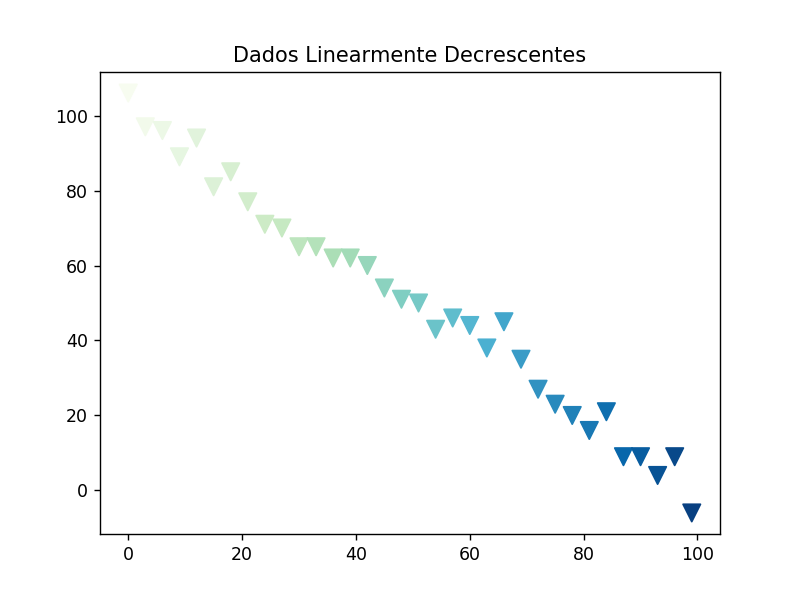

In [21]:
linearDecrease = numpy.load('linearDecrease.npy')
plt.figure()
plt.scatter(linearDecrease[0], linearDecrease[1], c=range(linearDecrease[1].size), cmap='GnBu', marker='v', s=100)
plt.title('Dados Linearmente Decrescentes')
plt.show()

In [22]:
print u'Visualização mais votada para dados constantes (em conjunto): {0}'.format(df_allTypes.constant.idxmax())

Visualização mais votada para dados constantes (em conjunto): GnBu_^_100


<IPython.core.display.Javascript object>


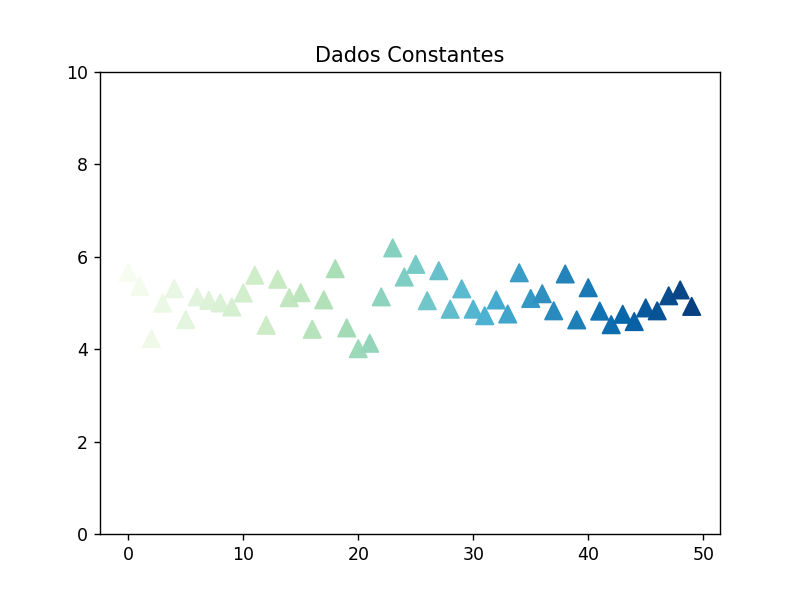

In [23]:
constant = numpy.load('constant.npy')
plt.figure()
plt.scatter(constant[0], constant[1], c=range(constant[1].size), cmap='GnBu', marker='^', s=100)
plt.title(u'Dados Constantes')
plt.ylim(0,10)
plt.show()

[ 0.76923077  0.53333333  0.42857143  0.83333333  0.6         0.42105263
  0.46666667  0.64285714  0.38888889  0.57142857  0.5         0.3125
  0.45454545  0.53333333  0.16666667  0.28571429  0.2         0.2         0.4375
  0.6875      0.61111111  0.63636364  0.73684211  0.55555556  0.70588235
  0.45        0.4375    ]


<IPython.core.display.Javascript object>


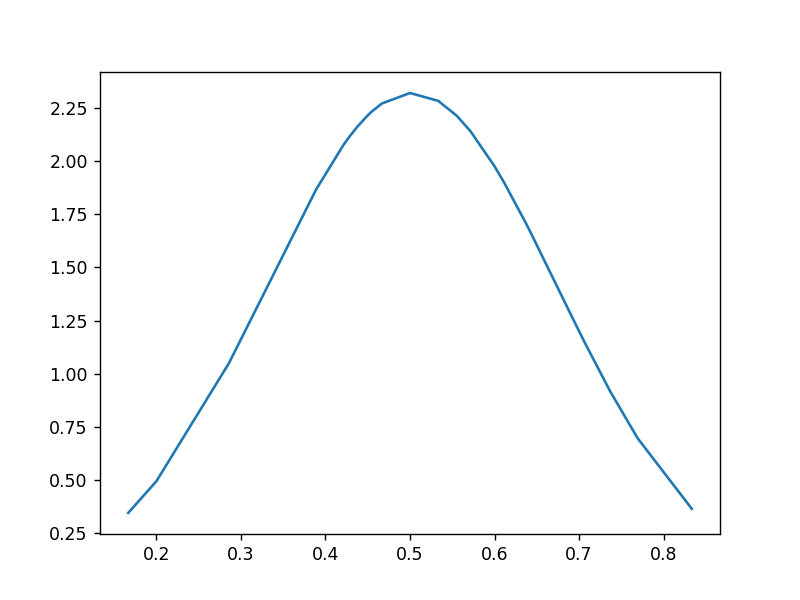

In [24]:
print df_allTypes.linearIncrease.values
plt.figure()
import scipy.stats as stats
linIncScores = df_allTypes.linearIncrease.values
linIncScores.sort()
pdf = stats.norm.pdf(linIncScores, numpy.mean(linIncScores), numpy.std(linIncScores))
plt.plot(linIncScores, pdf)
plt.show()

Visualização mais votada para dados linearmente crescentes (em conjunto): YlOrRd_v_750


<IPython.core.display.Javascript object>


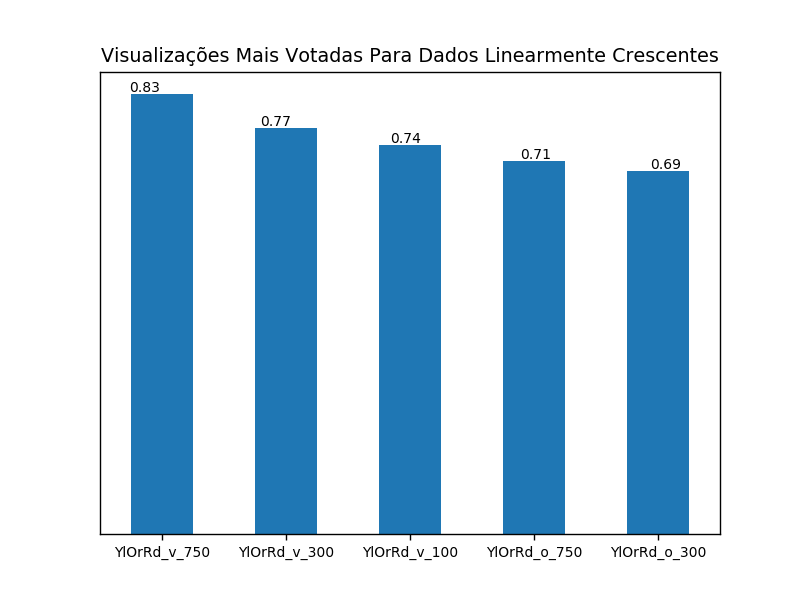

In [25]:
print u'Visualização mais votada para dados linearmente crescentes (em conjunto): {0}'.format(df_allTypes.linearIncrease.idxmax())
plt.figure()
linIncGlobalScores = df_allTypes.linearIncrease.sort_values( ascending=False)[:5]
linIncGlobalScores = linIncGlobalScores.plot.bar(rot=0, fontsize=8)
plt.title(u"Visualizações Mais Votadas Para Dados Linearmente Crescentes", fontsize=11)
for p in linIncGlobalScores.patches:
    linIncGlobalScores.annotate('{:.2f}'.format(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.005), fontsize=8)
linIncGlobalScores.set_yticks([])
plt.show()

<IPython.core.display.Javascript object>


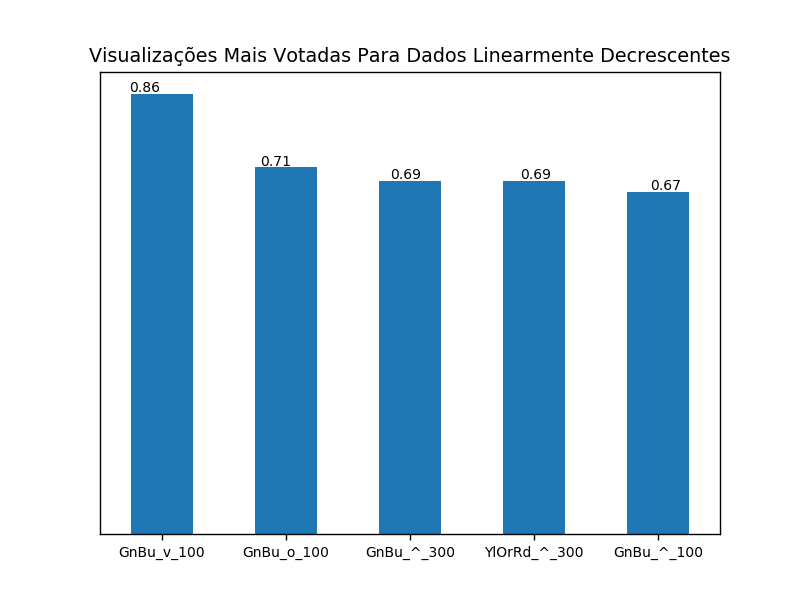

In [26]:
plt.figure()
linDecGlobalScores = df_allTypes.linearDecrease.sort_values(ascending=False)[:5]
linDecGlobalScores = linDecGlobalScores.plot.bar(rot=0, fontsize=8)
plt.title(u"Visualizações Mais Votadas Para Dados Linearmente Decrescentes", fontsize=11)
for p in linDecGlobalScores.patches:
    linDecGlobalScores.annotate('{:.2f}'.format(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.005), fontsize=8)
linDecGlobalScores.set_yticks([])
plt.show()

Visualização mais votada para dados constantes (em conjunto): GnBu_^_100


<IPython.core.display.Javascript object>


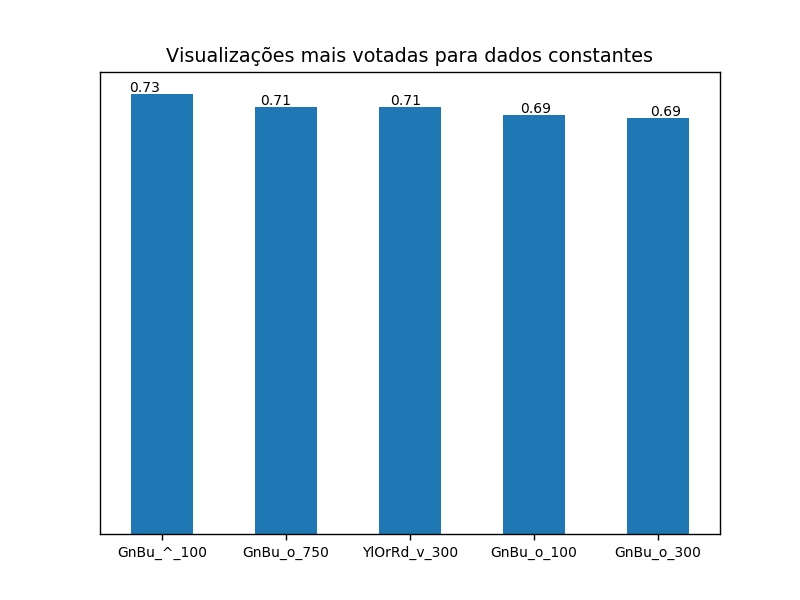

In [27]:
print u'Visualização mais votada para dados constantes (em conjunto): {0}'.format(df_allTypes.constant.idxmax())

plt.figure()
cteGlobalScores = df_allTypes.constant.sort_values(ascending=False)[:5]
cteGlobalScores = cteGlobalScores.plot.bar(rot=0, fontsize=8)
plt.title(u"Visualizações mais votadas para dados constantes", fontsize=11)
for p in cteGlobalScores.patches:
    cteGlobalScores.annotate('{:.2f}'.format(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.005), fontsize=8)
cteGlobalScores.set_yticks([])
plt.show()